In [7]:
import log_util
import matplotlib.pyplot as plt

plot_fmt = {
    'marker':'.',
}

ax_title_fmt = {
    'size':14
}

tick_fmt = {
    'size':'large'
}

legend_fmt = {
    'fontsize':14
}

title_fmt = {
    'size':16
}

In [8]:
def plotRuns(x_dim, x_label, title):

    fig, ax = plt.subplots(**{'facecolor': '#EDF1F9'})
    N = [20,60,100,140,180]
    
    for n in N:
        data = log_util.getAverageData(n)
        label = '{} particles'.format(n)
        data.rename(columns={'bestFitness': label}, inplace=True)
        data.plot(kind='line', x=x_dim, y=label, ax=ax, figsize=(10,8), **plot_fmt)

    plt.xlabel(x_label, fontdict=ax_title_fmt)
    plt.ylabel('Power Loss (MW)', fontdict=ax_title_fmt)
    plt.title(title, **title_fmt)
    plt.yticks(**tick_fmt)
    plt.xticks(**tick_fmt)
    plt.legend(**legend_fmt)
    plt.grid()
    
    return ax

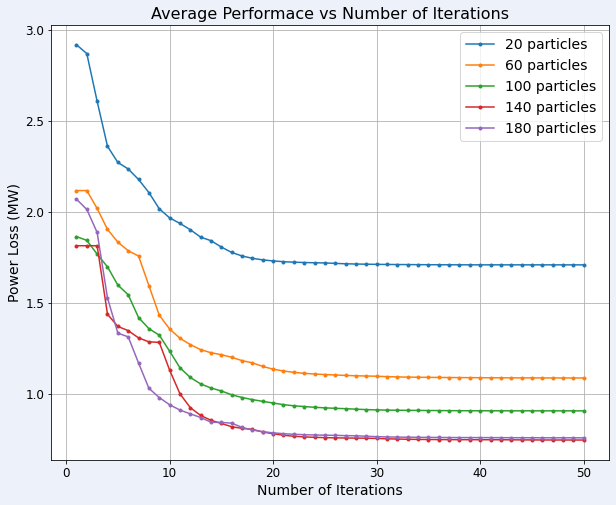

In [9]:
title = 'Average Performace vs Number of Iterations'
x_dim = 'iteration'
x_label = 'Number of Iterations'
plotRuns(x_dim, x_label, title)

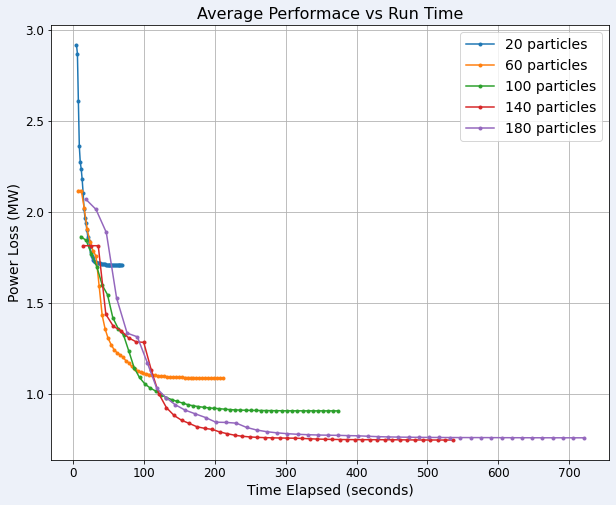

In [10]:
title = 'Average Performace vs Run Time'
x_dim = 'timeElapsed'
x_label = 'Time Elapsed (seconds)'
plotRuns(x_dim, x_label, title)

In [11]:
def plotQuantities(x_dim, x_label, y_dim, y_label, title):

    fig, ax = plt.subplots(**{'facecolor': '#EDF1F9'})
    N = [20,60,100,140,180]
    
    for n in N:
        data = log_util.getAverageData(n)
        label = '{} particles'.format(n)
        data.rename(columns={y_dim: label}, inplace=True)
        data.plot(kind='line', x=x_dim, y=label, ax=ax, figsize=(10,8), **plot_fmt)

    plt.xlabel(x_label, fontdict=ax_title_fmt)
    plt.ylabel(y_label, fontdict=ax_title_fmt)
    plt.title(title, **title_fmt)
    plt.yticks(**tick_fmt)
    plt.xticks(**tick_fmt)
    plt.legend(**legend_fmt)
    plt.grid()
    
    return ax

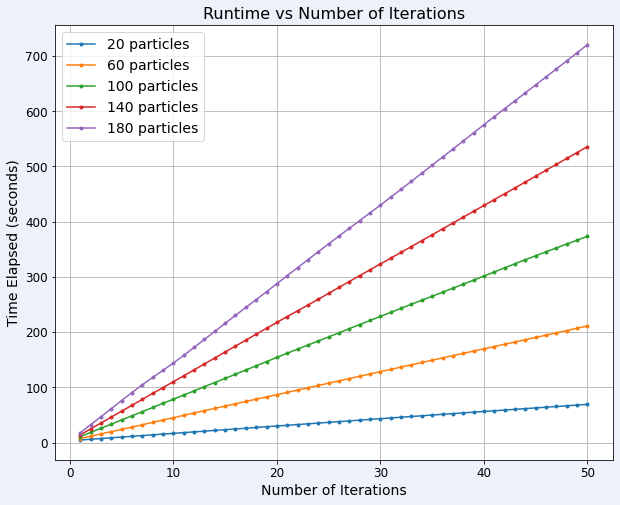

In [12]:
title = 'Runtime vs Number of Iterations'
x_dim = 'iteration'
x_label = 'Number of Iterations'
y_dim = 'timeElapsed'
y_label = 'Time Elapsed (seconds)'
plotQuantities(x_dim, x_label, y_dim, y_label, title)

In [14]:
def add(a,b,c):
    return a+b+c

A = [2,4,6]
B = [1,3,2]
C = [3,2,8]

sums = map(add, A, B, C)
[i for i in sums]

[6, 9, 16]

In [15]:
import pandas as pd

df = pd.Series(A)

In [16]:
df

0    2
1    4
2    6
dtype: int64

In [17]:
min(df)

2

In [20]:
from multiprocessing import Pool
help(Pool().map)

Help on method map in module multiprocessing.pool:

map(func, iterable, chunksize=None) method of multiprocessing.pool.Pool instance
    Apply `func` to each element in `iterable`, collecting the results
    in a list that is returned.



In [35]:
def getNumParticles(run_name):
    numbers = '0123456789'
    nums = []
    flg = 0
    i,j,k = 0,0,0
    
    while i < len(run_name):
        
        if run_name[i] in numbers and flg==0:
            j = i
            k = i
            flg = 1
            
        elif run_name[i] in numbers and flg==1:
            k += 1
        elif run_name[i] not in numbers and flg==1:
            k += 1
            flg = 0
            nums.append(int(run_name[j:k]))
        else:
            pass
        
        i += 1

    return nums[0]

In [36]:
run_names = ['particles180run2','particles20run3','parallel60run3','parallel40run3']
[getNumParticles(r)for r in run_names]

[180, 20, 60, 40]

In [37]:

getNumParticles('particles180run2')

180